In [5]:
import pandas as pd
data=pd.read_csv(r"/home/arun/Documents/jinu/Bangalore_AQI_Dataset.csv")
data

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,Bangalore,01/01/18,68,37.40,73.44,56.44,77.52,0.71,64.60
1,Bangalore,02/01/18,76,41.80,82.08,63.08,86.64,0.80,72.20
2,Bangalore,03/01/18,70,38.50,75.60,58.10,79.80,0.74,66.50
3,Bangalore,04/01/18,78,42.90,84.24,64.74,88.92,0.82,74.10
4,Bangalore,05/01/18,82,45.10,88.56,68.06,93.48,0.86,77.90
...,...,...,...,...,...,...,...,...,...
2551,Bangalore,27/12/24,54,29.70,58.32,44.82,61.56,0.57,51.30
2552,Bangalore,28/12/24,57,31.35,61.56,47.31,64.98,0.60,54.15
2553,Bangalore,29/12/24,70,38.50,75.60,58.10,79.80,0.74,66.50
2554,Bangalore,30/12/24,62,34.10,66.96,51.46,70.68,0.65,58.90


In [6]:
data.isnull().sum()

City     0
Date     0
AQI      0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [9]:
x = data[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = data['AQI']
y

0       68
1       76
2       70
3       78
4       82
        ..
2551    54
2552    57
2553    70
2554    62
2555    65
Name: AQI, Length: 2556, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train
y

0       68
1       76
2       70
3       78
4       82
        ..
2551    54
2552    57
2553    70
2554    62
2555    65
Name: AQI, Length: 2556, dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
li = LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [12]:
pre=li.predict(x_test)
pre

array([ 48.,  92.,  87.,  42.,  94.,  90.,  58.,  63.,  46.,  51., 150.,
        47.,  65.,  55.,  92.,  68.,  98.,  47., 114.,  69.,  61.,  41.,
        50.,  58.,  97.,  76.,  60.,  33., 132.,  92.,  62., 108.,  83.,
        56.,  64.,  52., 144.,  83.,  48.,  64.,  44.,  87.,  39.,  52.,
       119.,  88.,  96., 108.,  62.,  98.,  96., 106.,  80.,  57.,  44.,
        69.,  49.,  99.,  60.,  88., 105., 107., 102.,  52.,  61.,  65.,
        75.,  88.,  65.,  90.,  64.,  94.,  77.,  49.,  52.,  69.,  67.,
        96.,  89.,  77.,  80., 121.,  48., 102.,  42.,  47.,  58., 102.,
        70.,  59.,  82.,  34.,  92.,  99.,  57., 133.,  65.,  80., 146.,
       161., 130.,  57., 113.,  91.,  40.,  64.,  39.,  50.,  50.,  55.,
        76.,  55.,  53., 105., 100.,  43.,  67.,  77.,  74.,  76., 110.,
        70.,  48., 120.,  76., 102.,  42.,  44., 105.,  96.,  66.,  53.,
        60.,  76.,  50.,  73.,  78.,  65.,  96.,  92., 155., 104.,  69.,
        79.,  65., 110.,  48., 106.,  55.,  43.,  6

In [13]:

import pickle
f=open('li.pkl', 'wb')
pickle.dump(li, f)
f.close()

In [14]:
f=open('li.pkl','rb')
li=pickle.load(f)
f.close()

In [15]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [16]:
data=dt_regressor.predict(x_test)
data


array([ 48.,  92.,  87.,  42.,  94.,  90.,  58.,  63.,  46.,  51., 150.,
        47.,  65.,  55.,  92.,  68.,  98.,  47., 114.,  69.,  61.,  41.,
        50.,  58.,  97.,  76.,  60.,  33., 132.,  92.,  62., 108.,  83.,
        56.,  64.,  52., 144.,  83.,  48.,  64.,  44.,  87.,  39.,  52.,
       119.,  88.,  96., 108.,  62.,  98.,  96., 106.,  80.,  57.,  44.,
        69.,  49.,  99.,  60.,  88., 105., 107., 102.,  52.,  61.,  65.,
        75.,  88.,  65.,  90.,  64.,  94.,  77.,  49.,  52.,  69.,  67.,
        96.,  89.,  77.,  80., 121.,  48., 102.,  42.,  47.,  58., 102.,
        70.,  59.,  82.,  34.,  92.,  99.,  57., 133.,  65.,  80., 146.,
       161., 130.,  57., 113.,  91.,  40.,  64.,  39.,  50.,  50.,  55.,
        76.,  55.,  53., 105., 100.,  43.,  67.,  77.,  74.,  76., 110.,
        70.,  48., 120.,  76., 102.,  42.,  44., 105.,  96.,  66.,  53.,
        60.,  76.,  50.,  73.,  78.,  65.,  96.,  92., 152., 104.,  69.,
        79.,  65., 110.,  48., 106.,  55.,  43.,  6

In [17]:

from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

1.0

In [18]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 3.8230171619273285e-28


In [19]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 1.955253733387902e-14


In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
pre=rf_regressor.predict(x_test)
pre

array([ 48.  ,  92.  ,  87.  ,  42.  ,  94.  ,  90.  ,  58.  ,  63.  ,
        46.  ,  51.  , 149.96,  47.  ,  65.  ,  55.  ,  92.  ,  68.  ,
        98.  ,  47.  , 114.  ,  69.  ,  61.  ,  41.  ,  50.  ,  58.  ,
        97.  ,  76.  ,  60.  ,  32.99, 132.01,  92.  ,  62.  , 108.  ,
        83.  ,  56.  ,  64.  ,  52.  , 143.94,  83.  ,  48.  ,  64.  ,
        44.  ,  87.  ,  39.  ,  52.  , 119.  ,  88.  ,  96.  , 108.  ,
        62.  ,  98.  ,  96.  , 106.  ,  80.  ,  57.  ,  44.  ,  69.  ,
        49.  ,  99.  ,  60.  ,  88.  , 105.  , 107.  , 102.  ,  52.  ,
        61.  ,  65.  ,  75.  ,  88.  ,  65.  ,  90.  ,  64.  ,  94.  ,
        77.  ,  49.  ,  52.  ,  69.  ,  67.  ,  96.  ,  89.  ,  77.  ,
        80.  , 121.  ,  48.  , 102.  ,  42.  ,  47.  ,  58.  , 102.  ,
        70.  ,  59.  ,  82.  ,  34.  ,  92.  ,  99.  ,  57.  , 133.  ,
        65.  ,  80.  , 145.87, 160.95, 130.  ,  57.  , 113.  ,  91.  ,
        40.  ,  64.  ,  39.  ,  50.  ,  50.  ,  55.  ,  76.  ,  55.  ,
      

In [22]:
from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

1.0

In [23]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 3.8230171619273285e-28


In [24]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 1.955253733387902e-14


In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [26]:
pre=knn_regressor.predict(x_test)
pre


array([ 48. ,  92. ,  87. ,  42. ,  94. ,  90. ,  58. ,  63. ,  46. ,
        51. , 150.6,  47. ,  65. ,  55. ,  92. ,  68. ,  98. ,  47. ,
       114. ,  69. ,  61. ,  41. ,  50. ,  58. ,  97. ,  76. ,  60. ,
        33.2, 132.4,  92. ,  62. , 108. ,  83. ,  56. ,  64. ,  52. ,
       143.8,  83. ,  48. ,  64. ,  44. ,  87. ,  39. ,  52. , 119. ,
        88. ,  96. , 108. ,  62. ,  98. ,  96. , 106. ,  80. ,  57. ,
        44. ,  69. ,  49. ,  99. ,  60. ,  88. , 105. , 107. , 102. ,
        52. ,  61. ,  65. ,  75. ,  88. ,  65. ,  90. ,  64. ,  94. ,
        77. ,  49. ,  52. ,  69. ,  67. ,  96. ,  89. ,  77. ,  80. ,
       121. ,  48. , 102. ,  42. ,  47. ,  58. , 102. ,  70. ,  59. ,
        82. ,  34. ,  92. ,  99. ,  57. , 133. ,  65. ,  80. , 145.4,
       161. , 130.2,  57. , 113. ,  91. ,  40. ,  64. ,  39. ,  50. ,
        50. ,  55. ,  76. ,  55. ,  53. , 105. , 100. ,  43. ,  67. ,
        77. ,  74. ,  76. , 110. ,  70. ,  48. , 119.8,  76. , 102. ,
        42. ,  44. ,

In [27]:
from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

1.0

In [28]:

from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 3.8230171619273285e-28


In [29]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 1.955253733387902e-14


In [30]:
import matplotlib.pyplot as plt

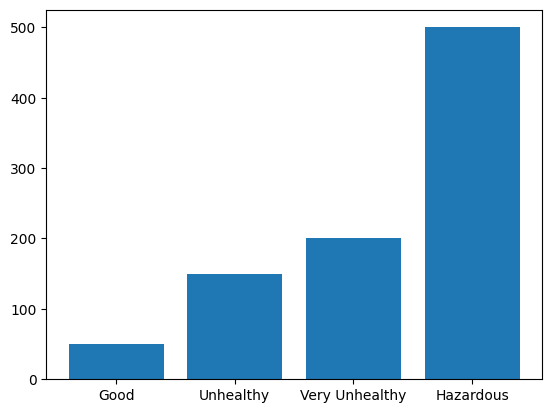

In [31]:
categories=['Good','Unhealthy','Very Unhealthy','Hazardous']
values= [50,150,200,500]
plt.bar(categories,values)
plt.show()